In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import shutil
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.applications import MobileNet



In [3]:
base_dir = "./data/ui_icons_dataset/"
train_dir = (os.path.join(base_dir,"train/"))
validation_dir = os.path.join(base_dir, "validation/")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        class_mode='categorical')

Found 13868 images belonging to 21 classes.
Found 1531 images belonging to 21 classes.


In [12]:
EPOCHS = 15
STEPS = 120

In [9]:
def create_model():
    batch_size = 20
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    predictions = tf.keras.layers.Dense(21, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [10]:
model = create_model()
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5,min_delta=0.005, mode='max', verbose=1),
 ModelCheckpoint('MobileNet.h5', monitor='val_loss', mode='max', save_best_only=True, save_weights_only=True),
 EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
history = model.fit( train_generator, steps_per_epoch=STEPS, epochs=EPOCHS, verbose=1,validation_data = validation_generator,callbacks = callbacks)


Epoch 1/60
240/240 [==============================] - 142s 586ms/step - loss: 1.4661 - accuracy: 0.5424 - val_loss: 1.0686 - val_accuracy: 0.6506 - lr: 0.0010
Epoch 2/60
240/240 [==============================] - 147s 611ms/step - loss: 1.1195 - accuracy: 0.6389 - val_loss: 0.9561 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 3/60
240/240 [==============================] - 144s 598ms/step - loss: 1.0436 - accuracy: 0.6585 - val_loss: 1.0112 - val_accuracy: 0.6754 - lr: 0.0010
Epoch 4/60
240/240 [==============================] - 119s 496ms/step - loss: 0.9811 - accuracy: 0.6805 - val_loss: 0.9235 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 5/60
240/240 [==============================] - 113s 472ms/step - loss: 0.9432 - accuracy: 0.6904 - val_loss: 0.8653 - val_accuracy: 0.7087 - lr: 0.0010
Epoch 6/60
240/240 [==============================] - ETA: 0s - loss: 0.9162 - accuracy: 0.6967
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
240/240 [=======================

KeyboardInterrupt: 

In [13]:
history = model.fit( train_generator, steps_per_epoch=STEPS, epochs=EPOCHS, verbose=1,validation_data = validation_generator,callbacks = callbacks)


Epoch 1/15
120/120 [==============================] - 81s 676ms/step - loss: 0.7066 - accuracy: 0.7728 - val_loss: 0.7364 - val_accuracy: 0.7479 - lr: 1.0000e-06
Epoch 2/15
120/120 [==============================] - 81s 678ms/step - loss: 0.6879 - accuracy: 0.7701 - val_loss: 0.7364 - val_accuracy: 0.7485 - lr: 1.0000e-06
Epoch 3/15
120/120 [==============================] - 82s 681ms/step - loss: 0.6873 - accuracy: 0.7643 - val_loss: 0.7362 - val_accuracy: 0.7485 - lr: 1.0000e-06
Epoch 4/15
120/120 [==============================] - 81s 679ms/step - loss: 0.6851 - accuracy: 0.7704 - val_loss: 0.7362 - val_accuracy: 0.7485 - lr: 1.0000e-06
Epoch 5/15
120/120 [==============================] - 82s 683ms/step - loss: 0.6903 - accuracy: 0.7714 - val_loss: 0.7362 - val_accuracy: 0.7479 - lr: 1.0000e-06
Epoch 6/15
120/120 [==============================] - ETA: 0s - loss: 0.7243 - accuracy: 0.7612
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
120/120 [========

Text(0.5, 1.0, 'Training and validation loss')

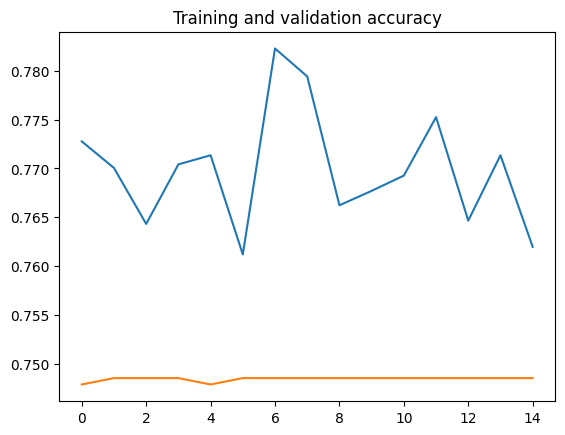

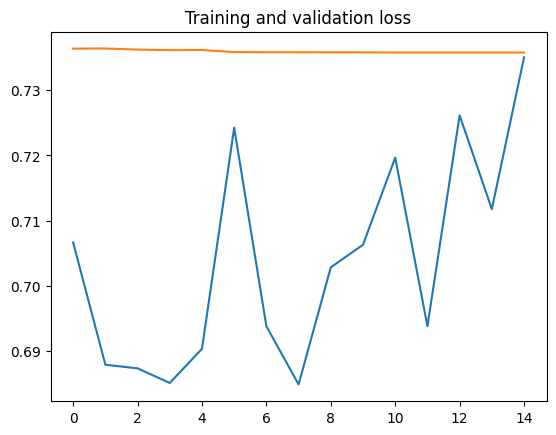

In [14]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [15]:
model_save_path = 'mobilenet'

# Save the model
model.save(model_save_path)

INFO:tensorflow:Assets written to: mobilenet\assets


INFO:tensorflow:Assets written to: mobilenet\assets


In [16]:

model_test  = tf.keras.models.load_model('mobilenet')

base_dir = "./data/ui_icons_dataset/"
test_dir = os.path.join(base_dir, "test/test")

IDs2 = []
Target2 = []

for i in range(len(os.listdir(test_dir))):
    image = cv2.imread(os.path.join(test_dir,os.listdir(test_dir)[i]))
    image = cv2.resize(image,(224,224)) 
    image = image.reshape(1,224,224,3)

    IDs2.append(os.listdir(test_dir)[i])

    prediction = model_test.predict(image)
    max_index = np.argmax(prediction)

    Target2.append(os.listdir(train_dir)[max_index])
            
df2 = pd.DataFrame({'ID': IDs2, 'Target': Target2})


1/1 [==============================] - 0s 100ms/step


In [ ]:
df2.to_csv('predictions_mobilenet.csv', index=False)
